In [1]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np
# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale

# matploblib 이용한 Background 그래프 실행 및 결과 확인
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family ="Malgun Gothic")


import operator
import seaborn as sns


In [2]:
df_tl = pd.read_csv("Telemarketing_Data_cl.csv", encoding='utf-8-sig' )
df_tl.head()

,연령,age_group,직업군,economic_group,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,연락일자,카드종류,card_category
0,56,5,주부,0,결혼,중졸,없음,없음,없음,유선전화,261,1,NaN,0,no,2018-01-03,87,life
1,57,5,서비스종사자,1,결혼,전문학교,미확인,없음,없음,유선전화,149,1,NaN,0,no,2018-01-03,88,life
2,37,3,서비스종사자,1,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,NaN,0,no,2018-01-03,89,life
3,40,4,회사원,1,결혼,검정고시,없음,없음,없음,유선전화,151,1,NaN,0,no,2018-01-03,90,life
4,56,5,서비스종사자,1,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,NaN,0,no,2018-01-03,91,life


In [3]:
df_tl.shape

(41188, 18)

In [4]:
df_tl.describe()

,연령,age_group,economic_group,통화시간,연락시도횟수,p_days,과거통화횟수,카드종류
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,1515.000000,41188.000000,41188.000000
mean,40.02406,3.551471,0.894654,258.285010,2.567593,6.014521,0.172963,156.975721
std,10.42125,1.066214,0.332077,259.279249,2.770014,3.824906,0.494901,40.713492
min,17.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,87.000000
25%,32.00000,3.000000,1.000000,102.000000,1.000000,3.000000,0.000000,122.000000
50%,38.00000,3.000000,1.000000,180.000000,2.000000,6.000000,0.000000,157.000000
75%,47.00000,4.000000,1.000000,319.000000,3.000000,7.000000,0.000000,192.000000
max,98.00000,9.000000,2.000000,4918.000000,56.000000,27.000000,7.000000,227.000000


In [5]:
df_tl.isnull().sum()

연령                    0
age_group             0
직업군                   0
economic_group        0
결혼여부                  0
학력                    0
신용카드소지여부              0
주택대출여부                0
개인대출여부                0
contact               0
통화시간                  0
연락시도횟수                0
p_days            39673
과거통화횟수                0
계약여부                  0
연락일자                  0
카드종류                  0
card_category         0
dtype: int64

In [6]:
df_tl.columns

Index(['연령', 'age_group', '직업군', 'economic_group', '결혼여부', '학력', '신용카드소지여부',
       '주택대출여부', '개인대출여부', 'contact', '통화시간', '연락시도횟수', 'p_days', '과거통화횟수',
       '계약여부', '연락일자', '카드종류', 'card_category'],
      dtype='object')

In [8]:
df_tl_num = df_tl.select_dtypes(exclude = "object")
df_tl_num.head()

,연령,age_group,economic_group,통화시간,연락시도횟수,p_days,과거통화횟수,카드종류
0,56,5,0,261,1,NaN,0,87
1,57,5,1,149,1,NaN,0,88
2,37,3,1,226,1,NaN,0,89
3,40,4,1,151,1,NaN,0,90
4,56,5,1,307,1,NaN,0,91


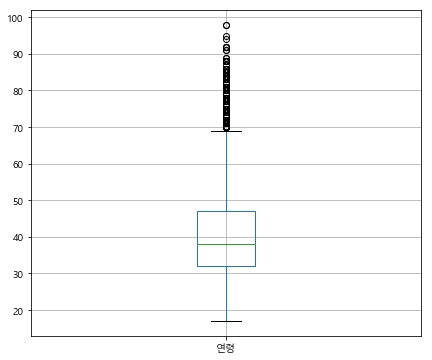

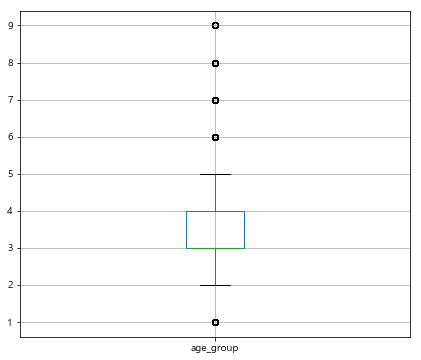

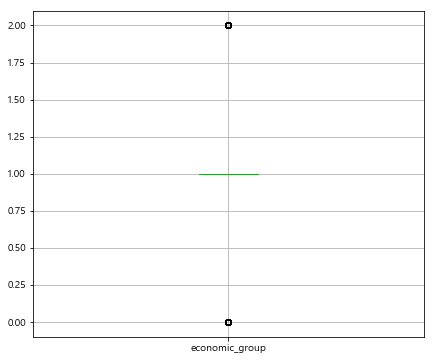

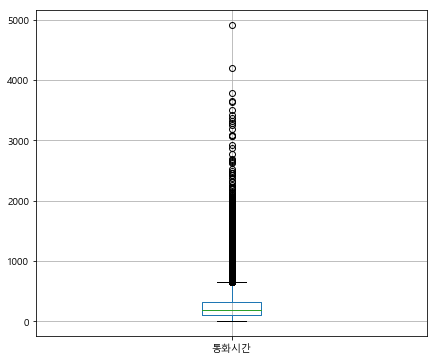

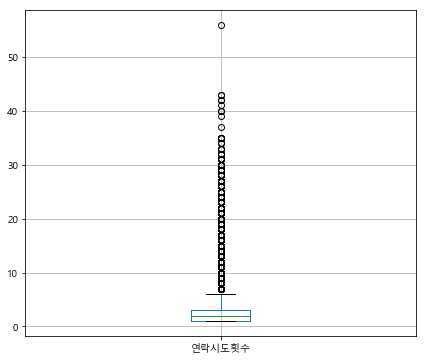

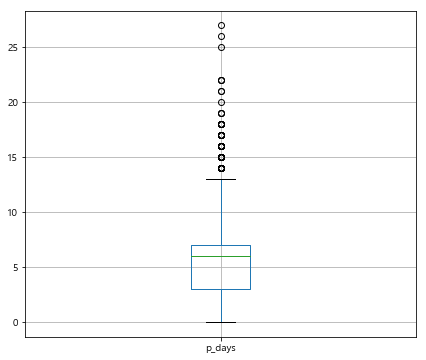

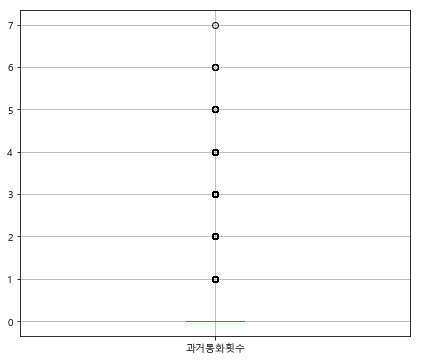

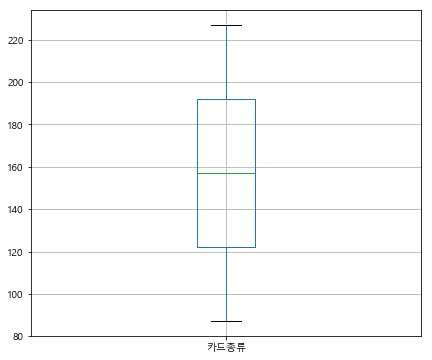

In [10]:
# select_dtypes 조건으로 변수 유형 선택: select_dtypes = "object"-문자형 변수
# 숫자형 변수 선택: select_dtypes="object"제외
df_tl_num = df_tl.select_dtypes(exclude = "object")
# boxplot : 상자수염도
x_columns = df_tl_num.columns
for x in x_columns:
        plt.figure(figsize=(7,6))
        boxplot = df_tl.boxplot(column=[x])
        plt.show()

In [29]:
df_tl.columns

Index(['연령', 'age_group', '직업군', 'economic_group', '결혼여부', '학력', '신용카드소지여부',
       '주택대출여부', '개인대출여부', 'contact', '통화시간', '연락시도횟수', 'p_days', '과거통화횟수',
       '계약여부', '연락일자', '카드종류', 'card_category'],
      dtype='object')

In [42]:
len(df_tl[df_tl["계약여부"] == "yes"]) / len(df_tl["계약여부"] )

0.11265417111780131

In [43]:
df_count =  df_tl["계약여부"].value_counts()
df_count

no     36548
yes     4640
Name: 계약여부, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

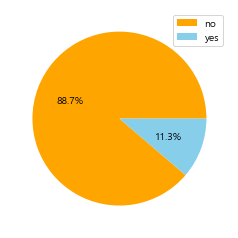

In [90]:
df_count =  df_tl["계약여부"].value_counts()
labels= ["no", "yes"]
plt.pie(df_count, colors = ["orange","skyblue"], autopct='%1.1f%%')
plt.legend(labels)
plt.show

In [49]:
df_tl["카드종류"].unique()

array([ 87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227], dtype=int64)

In [50]:
len(df_tl["카드종류"].unique())

141

In [57]:
df_tl["카드종류"][0:3]

0    87
1    88
2    89
Name: 카드종류, dtype: int64

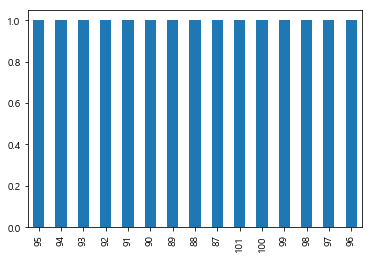

In [61]:
df_tl["카드종류"][0:15].value_counts().plot.bar()

In [76]:
len(df_tl[df_tl["카드종류"] ==144])

292

In [68]:
card_freq = []
for i in df_tl["카드종류"].unique():
    print(i, len(df_tl[df_tl["카드종류"] ==i]))

87 293
88 293
89 293
90 293
91 293
92 293
93 293
94 293
95 293
96 293
97 293
98 293
99 293
100 293
101 293
102 293
103 292
104 292
105 292
106 292
107 292
108 292
109 292
110 292
111 292
112 292
113 292
114 292
115 292
116 292
117 292
118 292
119 292
120 292
121 292
122 292
123 292
124 292
125 292
126 292
127 292
128 292
129 292
130 292
131 292
132 292
133 292
134 292
135 292
136 292
137 292
138 292
139 292
140 292
141 292
142 292
143 292
144 292
145 292
146 292
147 292
148 292
149 292
150 292
151 292
152 292
153 292
154 292
155 292
156 292
157 292
158 292
159 292
160 292
161 292
162 292
163 292
164 292
165 292
166 292
167 292
168 292
169 292
170 292
171 292
172 292
173 292
174 292
175 292
176 292
177 292
178 292
179 292
180 292
181 292
182 292
183 292
184 292
185 292
186 292
187 292
188 292
189 292
190 292
191 292
192 292
193 292
194 292
195 292
196 292
197 292
198 292
199 292
200 292
201 292
202 292
203 292
204 292
205 292
206 292
207 292
208 292
209 292
210 292
211 292
212 292
213 2

각 카드별 TM 횟수는 거의 동일하다.
292, 293

In [77]:
df_tl[df_tl["계약여부"] == "yes"][df_tl["카드종류"] ==144]

C:\Users\jk000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,연령,age_group,직업군,economic_group,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,연락일자,카드종류,card_category
1608,32,3,미확인,2,미확인,대졸학사,없음,없음,없음,유선전화,617,4,NaN,0,yes,2019-01-19,144,onlineShopping
4851,46,4,주부,0,결혼,중졸,없음,없음,없음,유선전화,506,2,NaN,0,yes,2018-08-30,144,onlineShopping
5415,46,4,산업노동자,1,결혼,중졸,없음,대출있음,없음,유선전화,1392,2,NaN,0,yes,2018-11-25,144,onlineShopping
7248,37,3,회사원,1,미혼,대졸학사,없음,대출있음,없음,유선전화,900,2,NaN,0,yes,2018-01-21,144,onlineShopping
13734,38,3,산업노동자,1,결혼,검정고시,미확인,없음,없음,휴대폰,500,1,NaN,0,yes,2018-09-27,144,onlineShopping
21066,47,4,산업노동자,1,결혼,미확인,미확인,없음,없음,유선전화,753,13,NaN,0,yes,2018-09-09,144,onlineShopping
21912,30,3,회사원,1,결혼,대졸학사,없음,없음,없음,유선전화,588,3,NaN,0,yes,2019-01-31,144,onlineShopping
24027,43,4,자영업자,1,결혼,전문학교,없음,대출있음,없음,유선전화,181,1,NaN,0,yes,2018-03-09,144,onlineShopping
29808,29,2,기술자,1,미혼,고졸,없음,대출있음,없음,휴대폰,114,2,NaN,0,yes,2018-11-16,144,onlineShopping
30231,51,5,기술자,1,결혼,석박사,없음,대출있음,대출있음,휴대폰,200,1,NaN,0,yes,2019-01-15,144,onlineShopping


In [ ]:
len(df_tl[df_tl["카드종류"] ==144])

In [88]:
cond1 = (df_tl["계약여부"] == "yes")
cond2 = (df_tl["카드종류"] ==144)
# df_tl.loc[cond1 & cond2]
len(df_tl[cond1 & cond2]) / len(df_tl[cond2])

0.09246575342465753

In [95]:
card_suceess = {}
cond1 = (df_tl["계약여부"] == "yes")
for i in df_tl["카드종류"].unique():
    cond2 = (df_tl["카드종류"] == i)
    # df_tl.loc[cond1 & cond2]
    print(i, len(df_tl[cond1 & cond2]) / len(df_tl[cond2]))
    card_suceess[i] = len(df_tl[cond1 & cond2]) / len(df_tl[cond2])
    
#     card_suceess.append(i,len(df_tl[cond1 & cond2]) / len(df_tl[cond2]) )

87 0.10580204778156997
88 0.11604095563139932
89 0.13651877133105803
90 0.09897610921501707
91 0.12627986348122866
92 0.11262798634812286
93 0.12627986348122866
94 0.09215017064846416
95 0.12286689419795221
96 0.10238907849829351
97 0.11262798634812286
98 0.11604095563139932
99 0.12627986348122866
100 0.11945392491467577
101 0.09897610921501707
102 0.10238907849829351
103 0.13356164383561644
104 0.11986301369863013
105 0.13356164383561644
106 0.11643835616438356
107 0.11643835616438356
108 0.11986301369863013
109 0.1095890410958904
110 0.13356164383561644
111 0.11643835616438356
112 0.1095890410958904
113 0.10273972602739725
114 0.10273972602739725
115 0.08904109589041095
116 0.11301369863013698
117 0.11301369863013698
118 0.0958904109589041
119 0.08561643835616438
120 0.09931506849315068
121 0.11986301369863013
122 0.09246575342465753
123 0.09246575342465753
124 0.10616438356164383
125 0.11301369863013698
126 0.10616438356164383
127 0.08904109589041095
128 0.1404109589041096
129 0.102

In [109]:
sdict= sorted(card_suceess.items(), key=operator.itemgetter(1), reverse = True)
sdict

[(155, 0.14726027397260275),
 (204, 0.14726027397260275),
 (152, 0.14383561643835616),
 (211, 0.14383561643835616),
 (128, 0.1404109589041096),
 (156, 0.1404109589041096),
 (185, 0.136986301369863),
 (203, 0.136986301369863),
 (89, 0.13651877133105803),
 (103, 0.13356164383561644),
 (105, 0.13356164383561644),
 (110, 0.13356164383561644),
 (160, 0.13356164383561644),
 (162, 0.13356164383561644),
 (178, 0.13356164383561644),
 (193, 0.13356164383561644),
 (149, 0.13013698630136986),
 (173, 0.13013698630136986),
 (197, 0.13013698630136986),
 (146, 0.1267123287671233),
 (147, 0.1267123287671233),
 (159, 0.1267123287671233),
 (163, 0.1267123287671233),
 (169, 0.1267123287671233),
 (202, 0.1267123287671233),
 (207, 0.1267123287671233),
 (213, 0.1267123287671233),
 (91, 0.12627986348122866),
 (93, 0.12627986348122866),
 (99, 0.12627986348122866),
 (133, 0.1232876712328767),
 (153, 0.1232876712328767),
 (166, 0.1232876712328767),
 (184, 0.1232876712328767),
 (186, 0.1232876712328767),
 (210, 0

In [130]:
sdict[0][0]

155

In [140]:
sd = pd.DataFrame(sdict, columns = ["cardnum", "rate"])
sd.head()

,cardnum,rate
0,155,0.147260
1,204,0.147260
2,152,0.143836
3,211,0.143836
4,128,0.140411


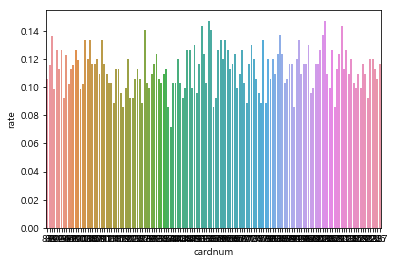

In [147]:
sns.barplot(x = "cardnum", y = "rate", data = sd)
# plt.plot(x = "cardnum", y = "rate", data = sd )

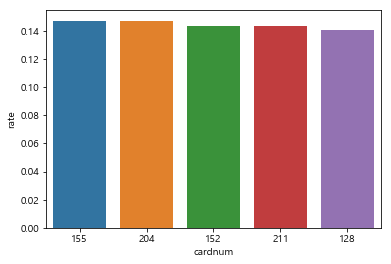

In [146]:
sns.barplot(x = "cardnum", y = "rate", data = sd[0:5], order = [155, 204, 152, 211, 128] )
# plt.plot(x = "cardnum", y = "rate", data = sd )